In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib

In [2]:
plt.style.use("paper")

In [3]:
savefig = True

In [4]:
grav = "GR_b64n512"
NFW_f = 0.02
rs_f = 1.0

In [5]:
d = pd.read_csv("./result_20.csv").dropna()

In [6]:
zs = pd.read_csv(
    "./data/redshift_list.txt",
    delimiter=" ",
    header=None,
    names=["snap", "z"]
).set_index("snap")

d["z"] = zs.loc[d["snap"]].values

In [7]:
d.head()

,prof,rs_f,grav,snap,f,bin,counts,rho_f,rho_s,z
0,nfw,0.3,GR_b64n512,122,0.01,1,1171,1.915147,4.961454,0.0
1,nfw,0.3,GR_b64n512,122,0.01,2,865,1.947312,4.968800,0.0
2,nfw,0.3,GR_b64n512,122,0.01,3,636,1.963783,4.972999,0.0
3,nfw,0.3,GR_b64n512,122,0.01,4,455,1.986951,4.969356,0.0
4,nfw,0.3,GR_b64n512,122,0.01,5,322,1.983046,4.963975,0.0


In [8]:
_d = d[
    (d['grav'] == grav) &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
]

x, y = _d['rho_f'], _d['rho_s']

In [9]:
def f_0(x, a):
    return a + x


popt_0, _ = curve_fit(f_0, x, y)

print(popt_0)
print(10**popt_0)
print(sum((f_0(x, *popt_0) - y) ** 2.0) / float(len(y) - len(popt_0)))

[2.71992665]
[524.71883428]
0.0048316119868474635


In [10]:
def f_1(x, a, b):
    return a + b * x


popt_1, _ = curve_fit(f_1, x, y)

print(popt_1)
print(sum((f_1(x, *popt_1) - y) ** 2.0) / float(len(y) - len(popt_1)))

[2.8067737 0.909195 ]
0.00402348684931611


In [11]:
def f_2(x, a, b, c):
    return a + b * x + c * x * x


popt_2, _ = curve_fit(f_2, x, y)

print(popt_2)
print(sum((f_2(x, *popt_2) - y) ** 2.0) / float(len(y) - len(popt_2)))

[ 2.77720914  0.97848547 -0.03610238]
0.004051288858992334


TODO: color code by whether halo bin falls below or above $M^*$, as calculated in `halo.ipynb`:

    snaps = [51, 61, 78, 93, 122]
    m_star = [
        12.195807148772062,
        12.556853371631494,
        12.830975647934311,
        12.919554466985371,
        12.981851739853052,
    ]

![m_star](./plots/mstar.pdf)

### Coloured by $z$

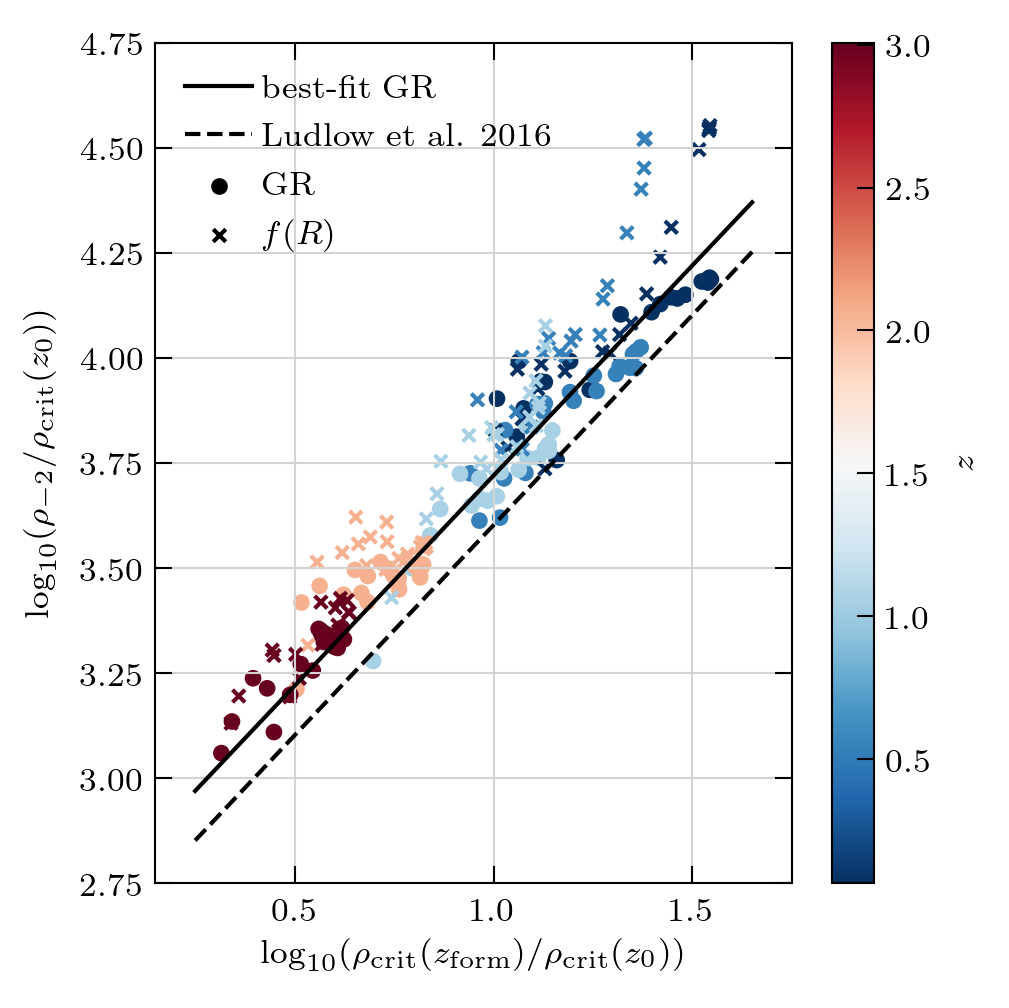

In [12]:
fig, ax = plt.subplots(1)

_d = d[(d["grav"] == "GR_b64n512") & (d["f"] == NFW_f) & (d["rs_f"] == rs_f)]

ax.scatter(x=_d["rho_f"], y=_d["rho_s"], marker="o", c=_d["z"], label=None)

_d = d[(d["grav"] == "fr6_b64n512") & (d["f"] == NFW_f) & (d["rs_f"] == rs_f)]

fig.colorbar(
    ax.scatter(x=_d["rho_f"], y=_d["rho_s"], marker="x", c=_d["z"] + 0.065, label=None),
    label=r"$z$",
    ticks=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0],
    ax=ax,
)

_x = np.array([0.25, 1.65])
ax.plot(_x, popt_0[0] + _x, "k-", label="best-fit GR")
ax.plot(_x, np.log10(400.0) + _x, "k--", label="Ludlow et al. 2016")

ax.set_ylabel(r"$\log_{10}(\rho_{-2} / \rho_{\mathrm{crit}}(z_{0}))$")
ax.set_xlabel(
    r"$\log_{10}(\rho_{\mathrm{crit}}(z_{\mathrm{form}}) / \rho_{\mathrm{crit}}(z_{0}))$"
)
ax.set_xlim([0.15, 1.75])
ax.set_ylim([2.75, 4.75])
ax.scatter([], [], c="k", marker="o", label=r"GR")
ax.scatter([], [], c="k", marker="x", label=r"$f(R)$")
ax.legend(loc="upper left")

fig.tight_layout()

if savefig:
    fig.savefig("./plots/rhorho_z.pdf")

### Split by $M^*$

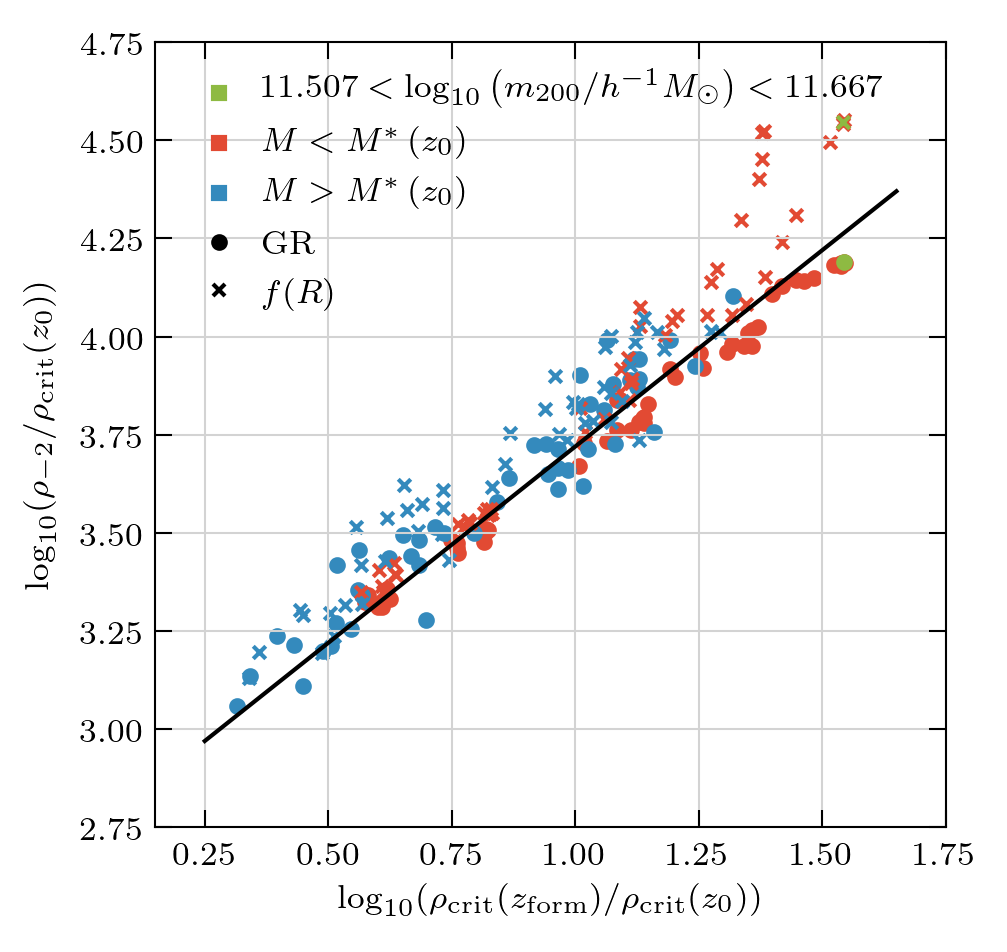

In [13]:
fig, ax = plt.subplots(1)

m_star_bins = [9, 11, 12, 12, 11]
snaps = [51, 61, 78, 93, 122]

_d = d[(d["grav"] == "GR_b64n512") & (d["f"] == NFW_f) & (d["rs_f"] == rs_f)]

for i, _s in enumerate(snaps):
    ax.scatter(
        x=_d[(_d["snap"] == _s) & (_d["bin"] < m_star_bins[i])]["rho_f"],
        y=_d[(_d["snap"] == _s) & (_d["bin"] < m_star_bins[i])]["rho_s"],
        marker="o",
        label=None,
        color="C0",
    )
    ax.scatter(
        x=_d[(_d["snap"] == _s) & (_d["bin"] >= m_star_bins[i])]["rho_f"],
        y=_d[(_d["snap"] == _s) & (_d["bin"] >= m_star_bins[i])]["rho_s"],
        marker="o",
        label=None,
        color="C1",
    )

ax.scatter(
    x=_d[(_d["snap"] == 122) & (_d["bin"] == 3)]["rho_f"],
    y=_d[(_d["snap"] == 122) & (_d["bin"] == 3)]["rho_s"],
    marker="o",
    label=None,
    color="C5",
)

_d = d[(d["grav"] == "fr6_b64n512") & (d["f"] == NFW_f) & (d["rs_f"] == rs_f)]

for i, _s in enumerate(snaps):
    ax.scatter(
        x=_d[(_d["snap"] == _s) & (_d["bin"] < m_star_bins[i])]["rho_f"],
        y=_d[(_d["snap"] == _s) & (_d["bin"] < m_star_bins[i])]["rho_s"],
        marker="x",
        label=None,
        color="C0",
    )
    ax.scatter(
        x=_d[(_d["snap"] == _s) & (_d["bin"] >= m_star_bins[i])]["rho_f"],
        y=_d[(_d["snap"] == _s) & (_d["bin"] >= m_star_bins[i])]["rho_s"],
        marker="x",
        label=None,
        color="C1",
    )

ax.scatter(
    x=_d[(_d["snap"] == 122) & (_d["bin"] == 3)]["rho_f"],
    y=_d[(_d["snap"] == 122) & (_d["bin"] == 3)]["rho_s"],
    marker="x",
    label=None,
    color="C5",
)

_x = np.array([0.25, 1.65])
ax.plot(_x, popt_0[0] + _x, "k-", label="best-fit, GR")
# ax.plot(_x, np.log10(400.0) + _x, "k--", label="Ludlow et al. 2016")

ax.set_ylabel(r"$\log_{10}(\rho_{-2} / \rho_{\mathrm{crit}}(z_{0}))$")
ax.set_xlabel(
    r"$\log_{10}(\rho_{\mathrm{crit}}(z_{\mathrm{form}}) / \rho_{\mathrm{crit}}(z_{0}))$"
)
ax.set_xlim([0.15, 1.75])
ax.set_ylim([2.75, 4.75])


ax.legend(
    handles=[
        matplotlib.lines.Line2D(
            [],
            [],
            c="C5",
            marker="s",
            linestyle="",
            label=r"$11.507<\log_{10}\left(m_{200} / h^{-1}M_{\odot}\right)<11.667$",
        ),
        matplotlib.lines.Line2D(
            [],
            [],
            c="C0",
            marker="s",
            linestyle="",
            label=r"$M<M^{*}\left(z_{0}\right)$",
        ),
        matplotlib.lines.Line2D(
            [],
            [],
            c="C1",
            marker="s",
            linestyle="",
            label=r"$M>M^{*}\left(z_{0}\right)$",
        ),
        matplotlib.lines.Line2D([], [], c="k", marker="o", label=r"GR", linestyle=""),
        matplotlib.lines.Line2D(
            [], [], c="k", marker="x", label=r"$f(R)$", linestyle=""
        ),
    ],
    loc="upper left",
)

if savefig:
    fig.savefig("./plots/rhorho_mstar.pdf")

### Coloured by mass bin

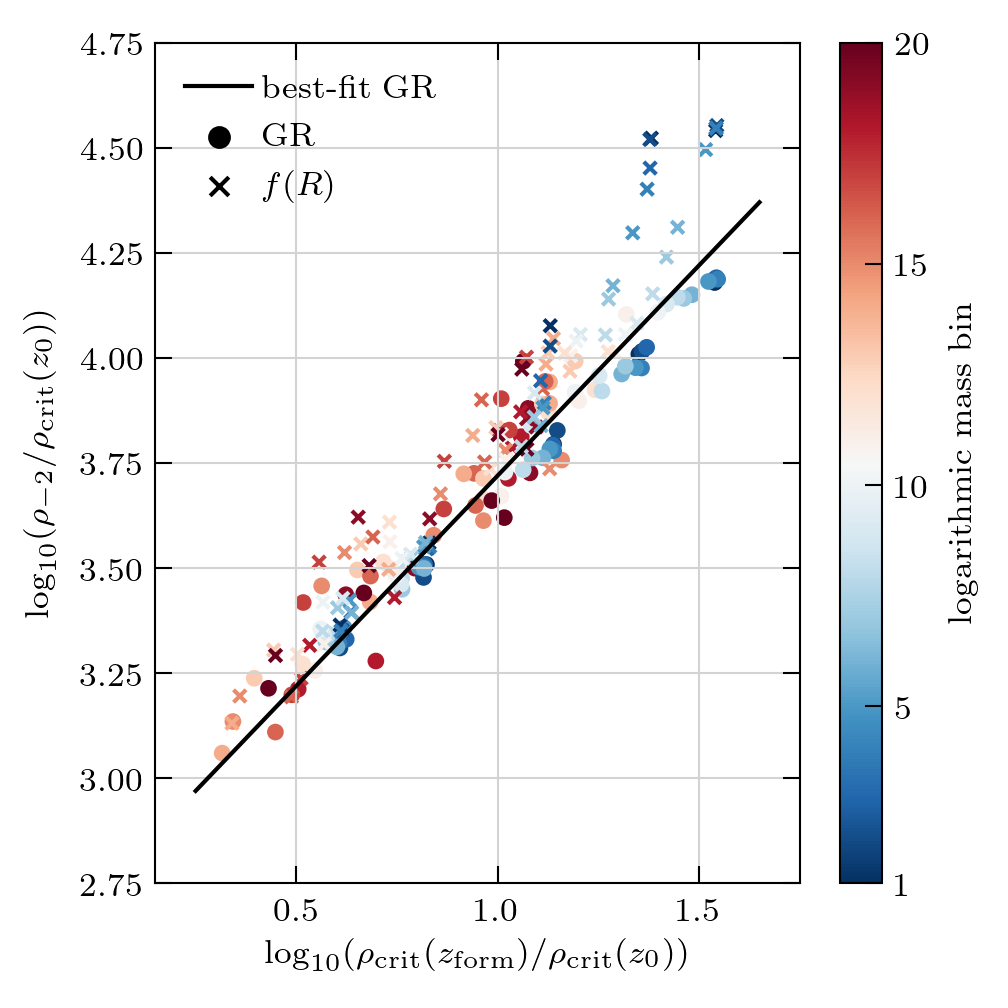

In [14]:
fig, ax = plt.subplots(1)

_d = d[(d["grav"] == "GR_b64n512") & (d["f"] == NFW_f) & (d["rs_f"] == rs_f)]

ax.scatter(x=_d["rho_f"], y=_d["rho_s"], marker="o", c=_d["bin"], label=None)

_d = d[(d["grav"] == "fr6_b64n512") & (d["f"] == NFW_f) & (d["rs_f"] == rs_f)]

fig.colorbar(
    ax.scatter(x=_d["rho_f"], y=_d["rho_s"], marker="x", c=_d["bin"], label=None),
    label=r"logarithmic mass bin",
    ticks=[1, 5, 10, 15, 20],
    ax=ax,
)

_x = np.array([0.25, 1.65])
ax.plot(_x, popt_0[0] + _x, "k-", label="best-fit GR")
# ax.plot(_x, np.log10(400.0) + _x, "k--", label="Ludlow et al. 2016")

ax.set_ylabel(r"$\log_{10}(\rho_{-2} / \rho_{\mathrm{crit}}(z_{0}))$")
ax.set_xlabel(
    r"$\log_{10}(\rho_{\mathrm{crit}}(z_{\mathrm{form}}) / \rho_{\mathrm{crit}}(z_{0}))$"
)
ax.set_xlim([0.15, 1.75])
ax.set_ylim([2.75, 4.75])
ax.scatter([], [], c="k", s=20, marker="o", label=r"GR")
ax.scatter([], [], c="k", s=20, marker="x", label=r"$f(R)$")
ax.plot([])
ax.legend(loc="upper left")

fig.tight_layout()

if savefig:
    fig.savefig("./plots/rhorho_bin.pdf")

### Split population

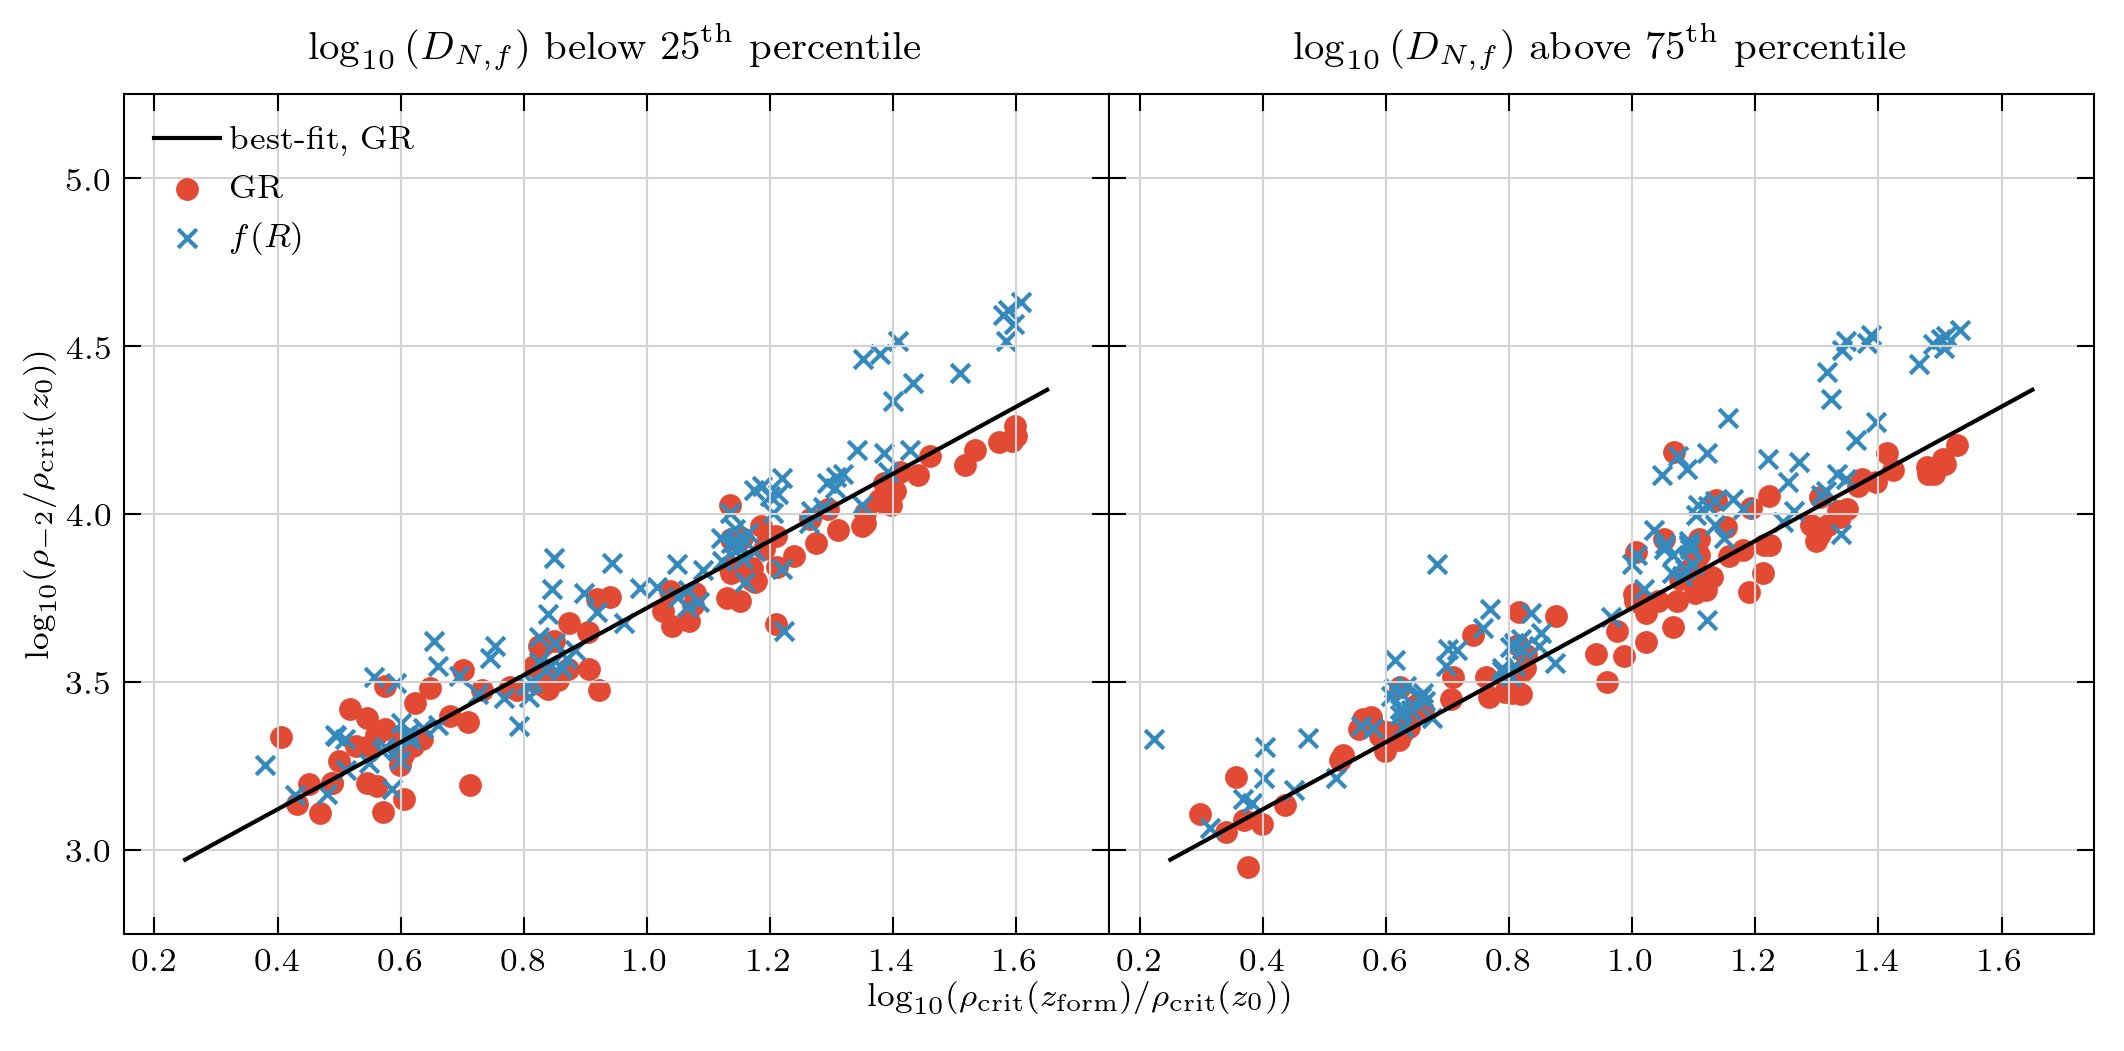

In [15]:
fig = plt.figure(figsize=(7.0, 3.4))
grid = plt.GridSpec(1, 2, hspace=0.0, wspace=0.0)

ax = [fig.add_subplot(grid[0, 0]), fig.add_subplot(grid[0, 1], yticklabels=[])]

d = pd.read_csv("./result_under.csv").dropna()
d[(d["grav"] == "GR_b64n512") & (d["f"] == NFW_f) & (d["rs_f"] == rs_f)].plot(
    ax=ax[0], kind="scatter", x="rho_f", y="rho_s", marker="o", c="C0", label="GR"
)
d[(d["grav"] == "fr6_b64n512") & (d["f"] == NFW_f) & (d["rs_f"] == rs_f)].plot(
    ax=ax[0], kind="scatter", x="rho_f", y="rho_s", marker="x", c="C1", label=r"$f(R)$"
)
ax[0].set_title(r"$\log_{10}\left(D_{N,f}\right)$ below $25^{\rm th}$ percentile")

d = pd.read_csv("./result_over.csv").dropna()
d[(d["grav"] == "GR_b64n512") & (d["f"] == NFW_f) & (d["rs_f"] == rs_f)].plot(
    ax=ax[1], kind="scatter", x="rho_f", y="rho_s", marker="o", c="C0", label=None
)
d[(d["grav"] == "fr6_b64n512") & (d["f"] == NFW_f) & (d["rs_f"] == rs_f)].plot(
    ax=ax[1], kind="scatter", x="rho_f", y="rho_s", marker="x", c="C1", label=None
)
ax[1].set_title(r"$\log_{10}\left(D_{N,f}\right)$ above $75^{\rm th}$ percentile")

_x = np.array([0.25, 1.65])
ax[0].plot(_x, popt_0[0] + _x, "k-", label="best-fit, GR")
ax[1].plot(_x, popt_0[0] + _x, "k-", label="best-fit, GR")

for _a in ax:
    _a.set_xlim([0.15, 1.75])
    _a.set_ylim([2.75, 5.25])
    _a.set_xlabel("")
    _a.set_ylabel("")

fig.text(
    0.5,
    0.0,
    r"$\log_{10}(\rho_{\mathrm{crit}}(z_{\mathrm{form}}) / \rho_{\mathrm{crit}}(z_{0}))$",
    ha="center",
)
fig.text(
    0.0,
    0.5,
    r"$\log_{10}(\rho_{-2} / \rho_{\mathrm{crit}}(z_{0}))$",
    va="center",
    rotation="vertical",
)

ax[0].legend(loc="upper left")

fig.tight_layout()

if savefig:
    plt.savefig("./plots/rhorho_dnf.pdf")

In [16]:
def plot_rhorho(ax, NFW_f, rs_f, print_yticklabels=False):
    # GR
    _d = d[(d["grav"] == "GR_b64n512") & (d["f"] == NFW_f) & (d["rs_f"] == rs_f)]
    ax.scatter(x=_d["rho_f"], y=_d["rho_s"], marker="o", c=_d["z"], s=10, label=None)
    # best fit
    _x = np.array([_d["rho_f"].min(), _d["rho_f"].max()])
    ax.plot(np.array([0.0, 2.0]), popt_0[0] + np.array([0.0, 2.0]), "k-")
    # f(R)
    _d = d[(d["grav"] == "fr6_b64n512") & (d["f"] == NFW_f) & (d["rs_f"] == rs_f)]
    ax.scatter(x=_d["rho_f"], y=_d["rho_s"], marker="x", c=_d["z"], s=10, label=None)

    ax.set_title(r"$%0.1f \times r_{-2}, f=%0.2f$" % (rs_f, NFW_f))
    ax.set_xlim((-0.25, 2.25))
    ax.set_ylim((2.25, 5.75))
    if not print_yticklabels:
        ax.set_yticklabels([])

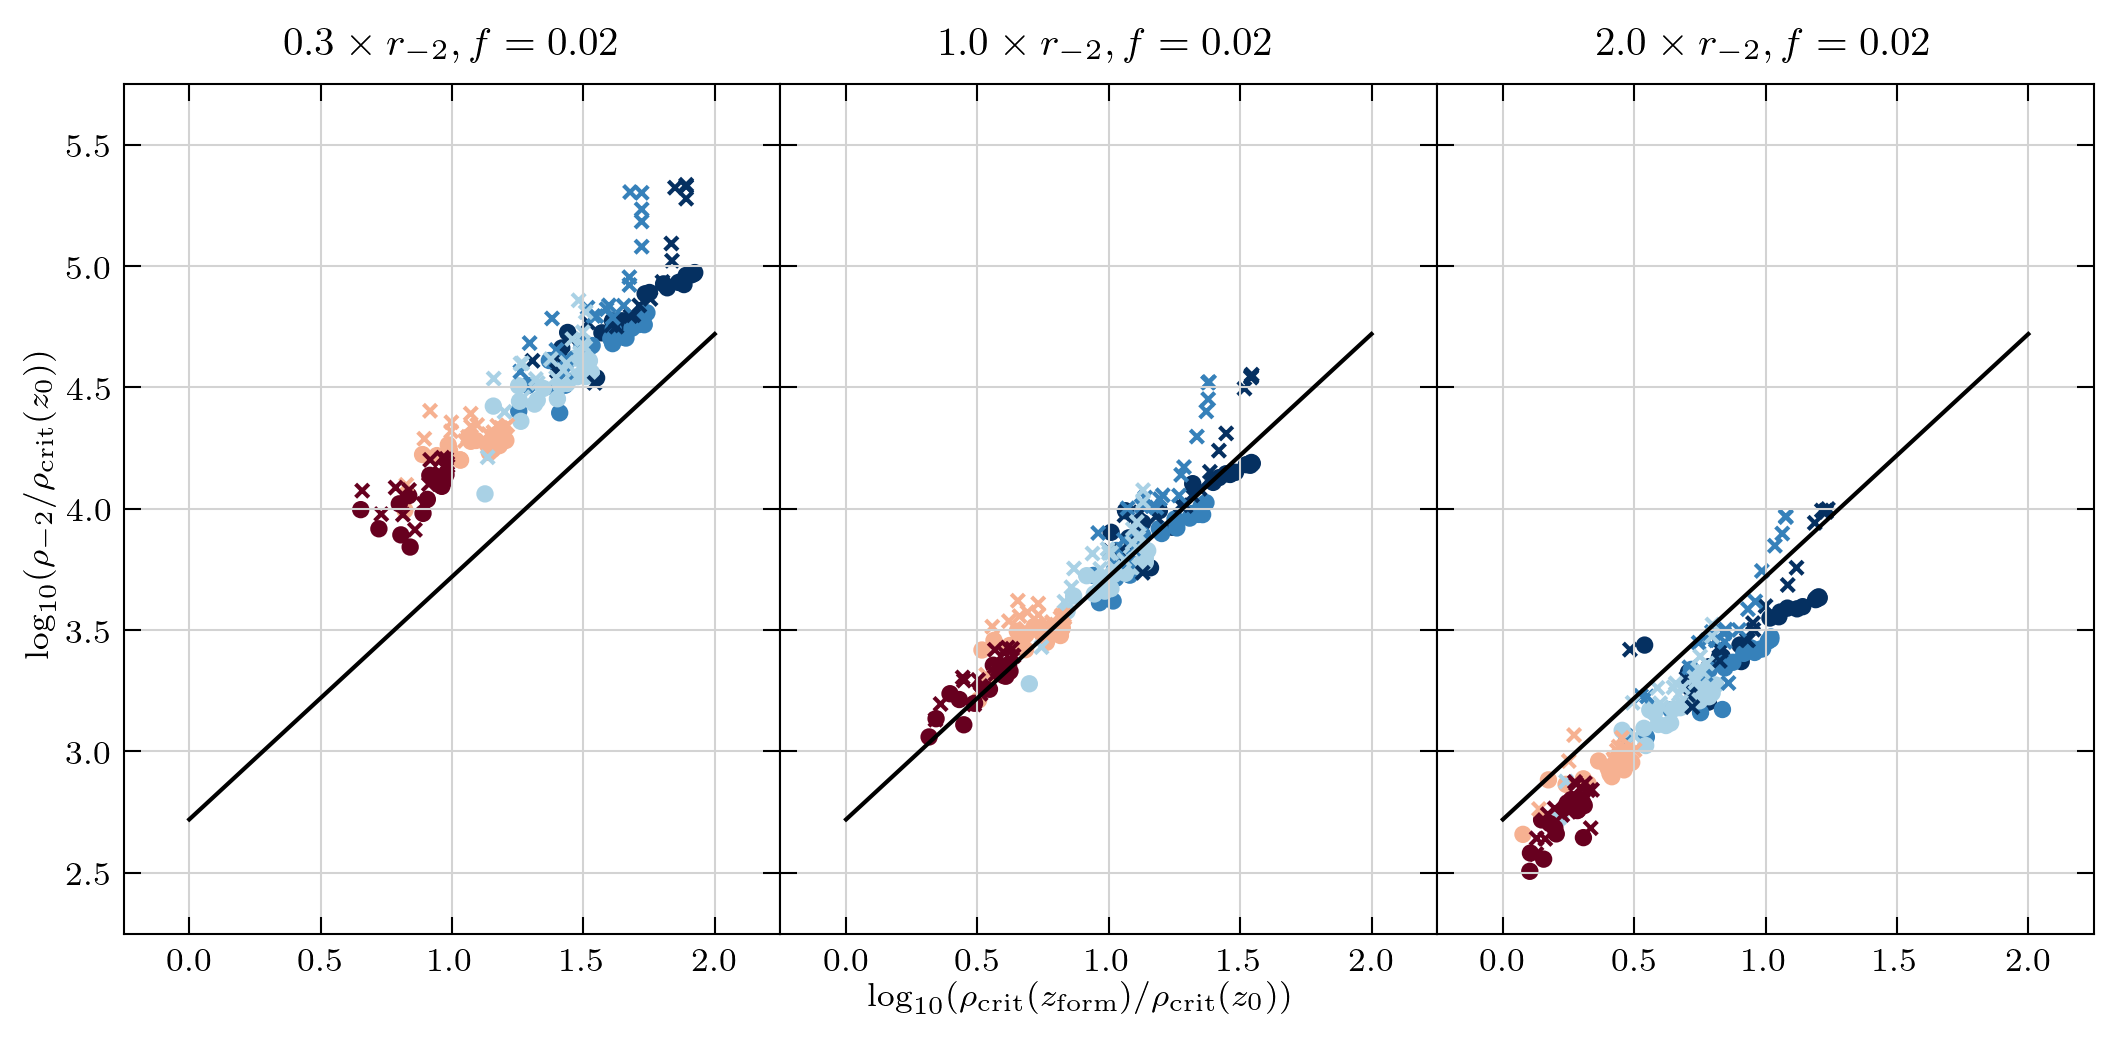

In [17]:
fig = plt.figure(figsize=(7.0, 3.4))
grid = plt.GridSpec(1, 3, hspace=0.0, wspace=0.0)

d = pd.read_csv("./result_20.csv").dropna()
d["z"] = zs.loc[d["snap"]].values

plot_rhorho(fig.add_subplot(grid[0, 0]), 0.02, 0.3, True)
plot_rhorho(fig.add_subplot(grid[0, 1]), 0.02, 1.0)
plot_rhorho(fig.add_subplot(grid[0, 2]), 0.02, 2.0)

fig.text(
    0.5,
    0.0,
    r"$\log_{10}(\rho_{\mathrm{crit}}(z_{\mathrm{form}}) / \rho_{\mathrm{crit}}(z_{0}))$",
    ha="center",
)
fig.text(
    0.0,
    0.5,
    r"$\log_{10}(\rho_{-2} / \rho_{\mathrm{crit}}(z_{0}))$",
    va="center",
    rotation="vertical",
)

fig.tight_layout()

if savefig:
    fig.savefig("./plots/rhorho_var_rs_f.pdf")

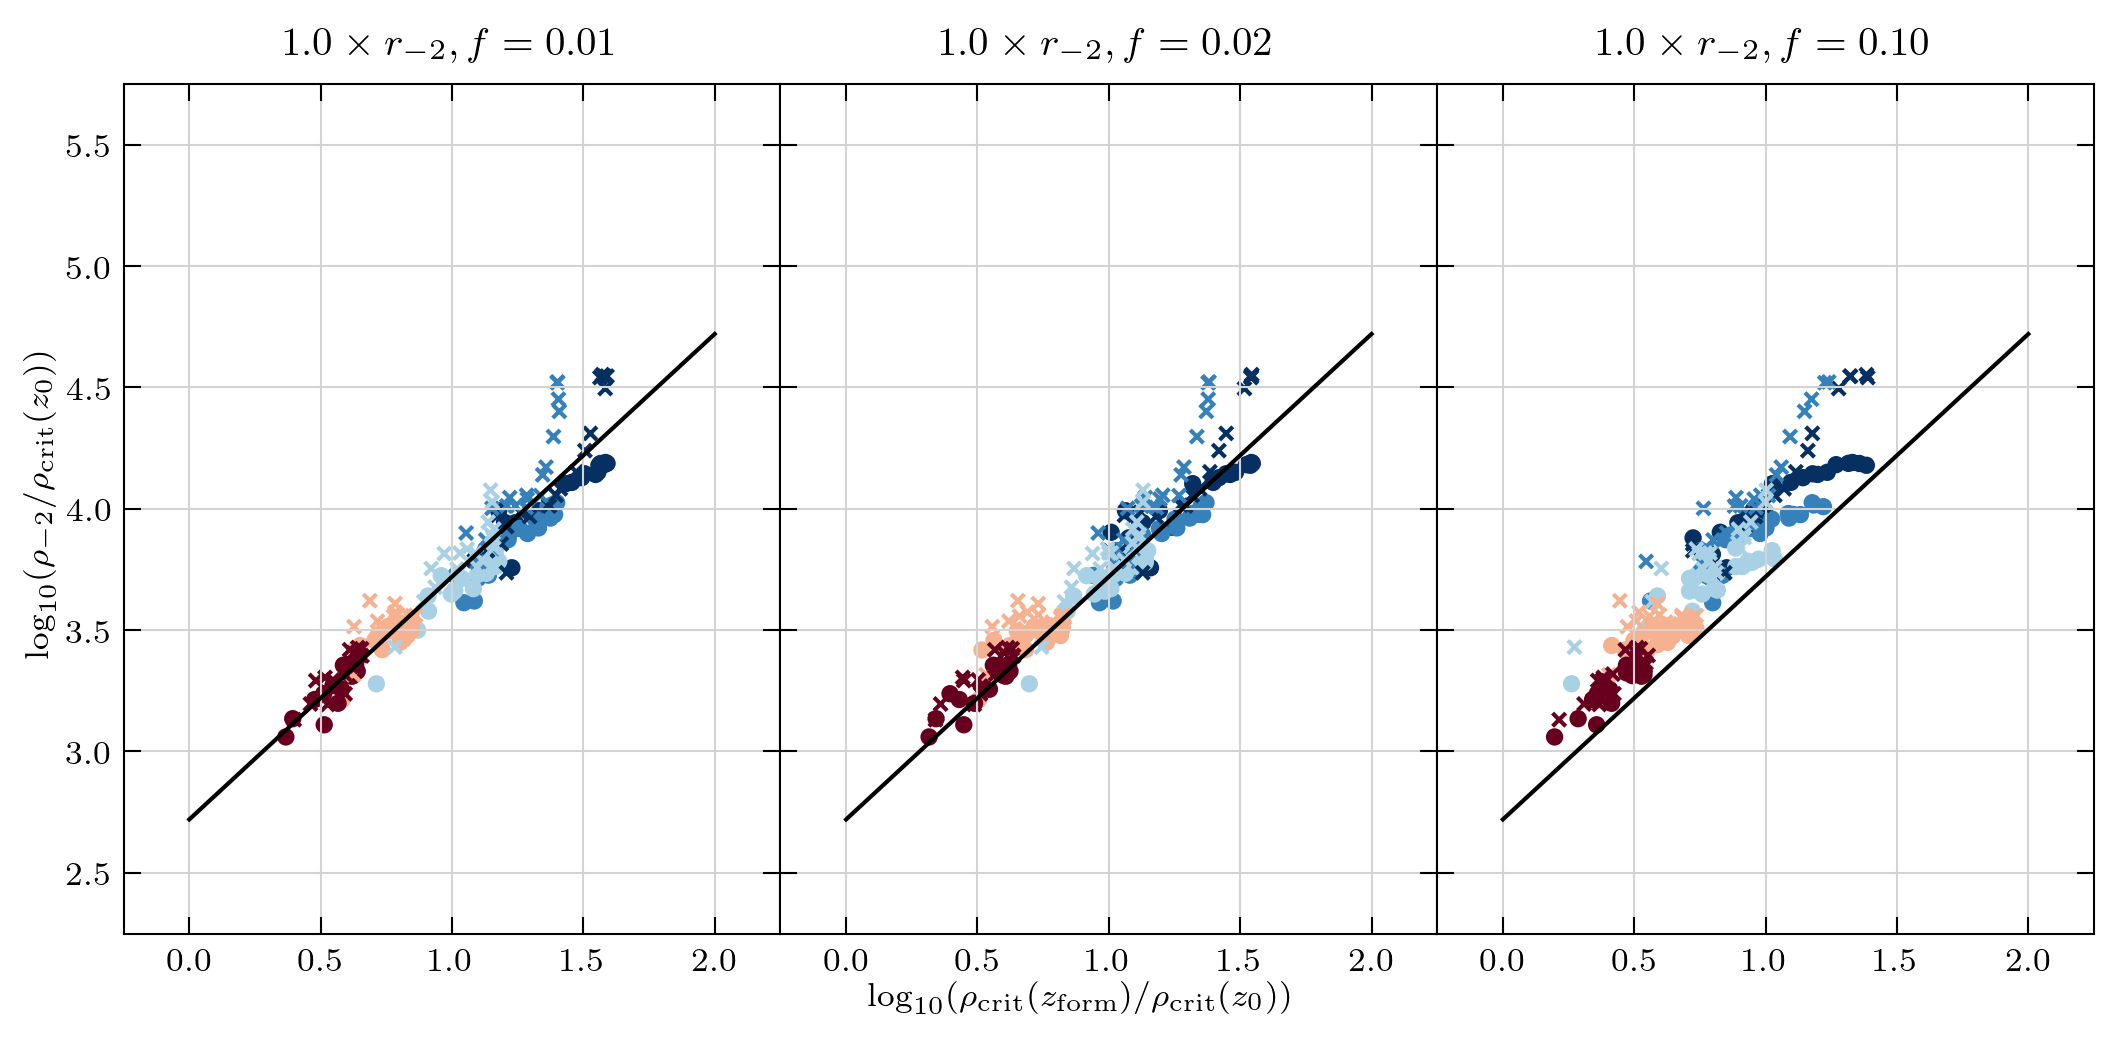

In [18]:
fig = plt.figure(figsize=(7.0, 3.4))
grid = plt.GridSpec(1, 3, hspace=0.0, wspace=0.0)

d = pd.read_csv("./result_20.csv").dropna()
d["z"] = zs.loc[d["snap"]].values

plot_rhorho(fig.add_subplot(grid[0, 0]), 0.01, 1.0, True)
plot_rhorho(fig.add_subplot(grid[0, 1]), 0.02, 1.0)
plot_rhorho(fig.add_subplot(grid[0, 2]), 0.10, 1.0)

fig.text(
    0.5,
    0.0,
    r"$\log_{10}(\rho_{\mathrm{crit}}(z_{\mathrm{form}}) / \rho_{\mathrm{crit}}(z_{0}))$",
    ha="center",
)
fig.text(
    0.0,
    0.5,
    r"$\log_{10}(\rho_{-2} / \rho_{\mathrm{crit}}(z_{0}))$",
    va="center",
    rotation="vertical",
)

fig.tight_layout()

if savefig:
    fig.savefig("./plots/rhorho_var_NFW_f.pdf")